<a href="https://colab.research.google.com/github/Neeraj7015187103/Neeraj7015187103/blob/main/Copy_of_session_50_LSTM_AND_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Autoencoders: Autoencoders are a type of neural network used for unsupervised learning and dimensionality reduction.
They consist of an encoder and a decoder, which work together to learn a compressed representation of input data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train[:6,:6]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 

In [ ]:
X_train = x_train.astype('float')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
np.prod(x_train.shape[1:])

784

In [ ]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#  Trian the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

Epoch 1/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2146 - val_loss: 0.1356
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1190 - val_loss: 0.1037
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0968 - val_loss: 0.0886
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0854 - val_loss: 0.0809
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0794 - val_loss: 0.0767
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0760 - val_loss: 0.0742
Epoch 7/50
235/235 [==============================] - 6s 23ms/step - loss: 0.0737 - val_loss: 0.0723
Epoch 8/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0721 - val_loss: 0.0710
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0701 - val_lo

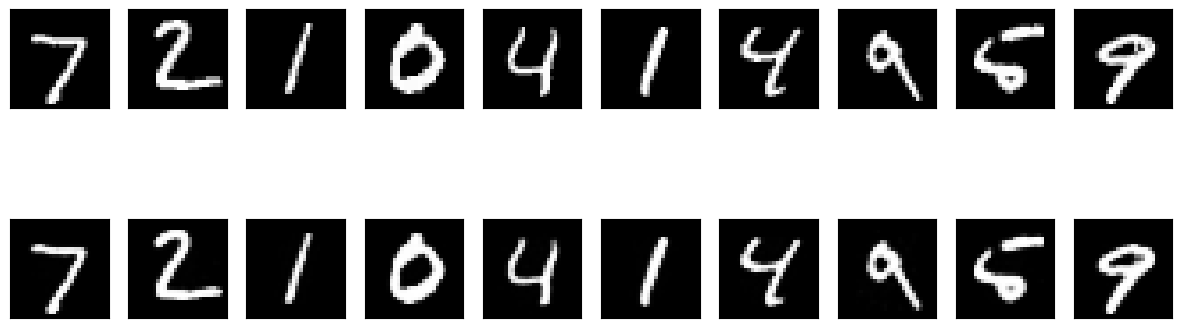

In [ ]:
# Visualize the reconstructed images
n=10
plt.figure(figsize=(15,5))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstucted Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()